## Importing the Libraries

In [4]:
import warnings as w
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#w.filterwarnings('ignore')


## Reading the dataset

from google.colab import drive

drive.mount("/content/drive")

In [5]:
df = pd.read_csv(
    r"C:\Users\ds12\College\ML-Assignments\Data Sets\Other Datasets\Iris.csv",
    index_col=0,
)


In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## Statistics of Dataset

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Structure of Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Plotting the Pairplots for the whole dataset.

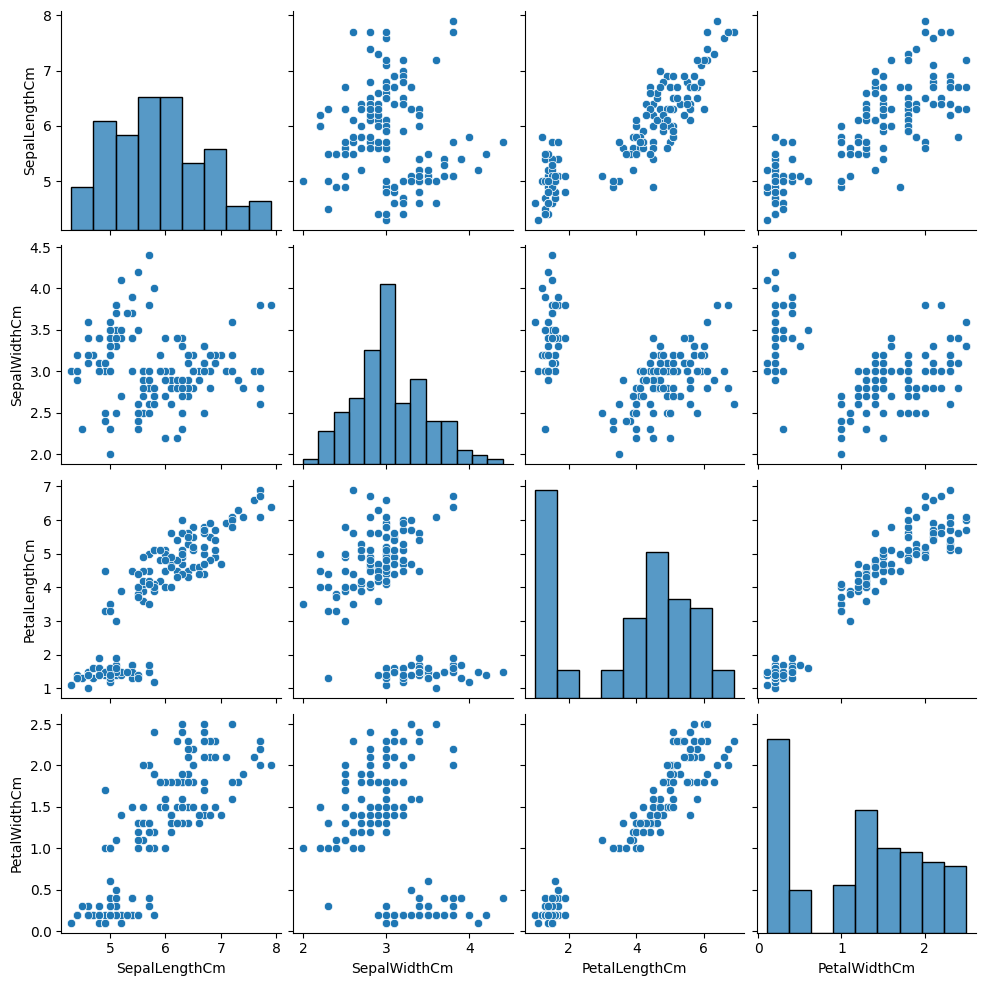

In [9]:
sns.pairplot(df)

# Plotting the Data Distribution for each feature.

C:\Users\ds12\AppData\Local\Temp\ipykernel_2672\2336163.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SepalLengthCm"], ax=ax[0, 0])
C:\Users\ds12\AppData\Local\Temp\ipykernel_2672\2336163.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SepalWidthCm"], ax=ax[0, 1])
C:\Users\ds12

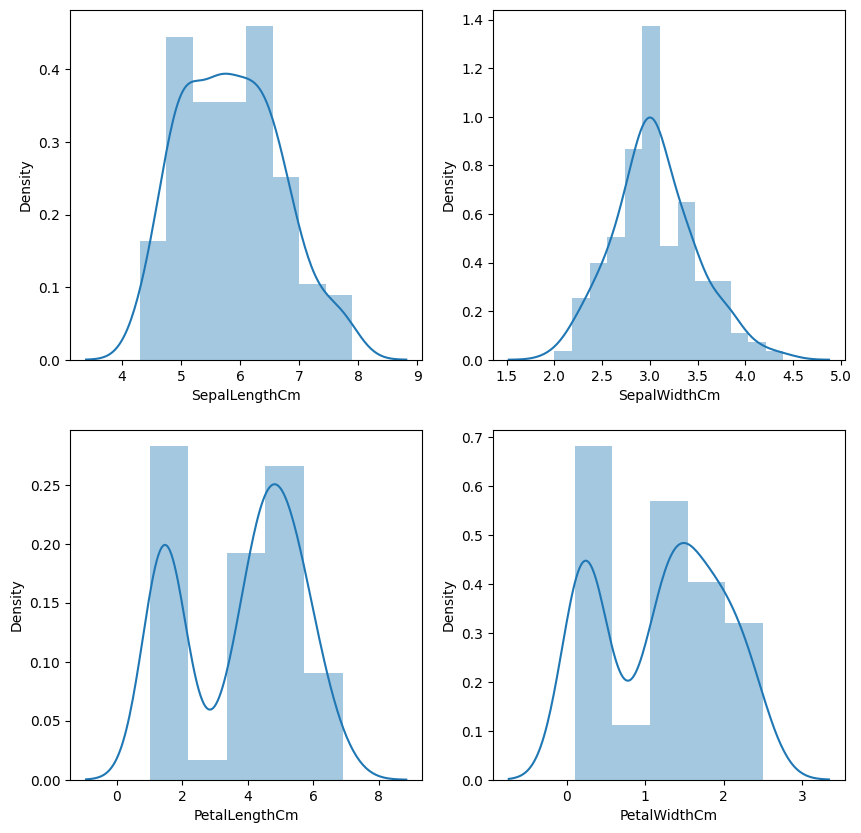

In [10]:
# Plotting distribution of each feature
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df["SepalLengthCm"], ax=ax[0, 0])
sns.distplot(df["SepalWidthCm"], ax=ax[0, 1])
sns.distplot(df["PetalLengthCm"], ax=ax[1, 0])
sns.distplot(df["PetalWidthCm"], ax=ax[1, 1])
plt.show()

In [11]:
df.Species.replace(
    {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace=True
)


## Barplot of SepalLength vs Species

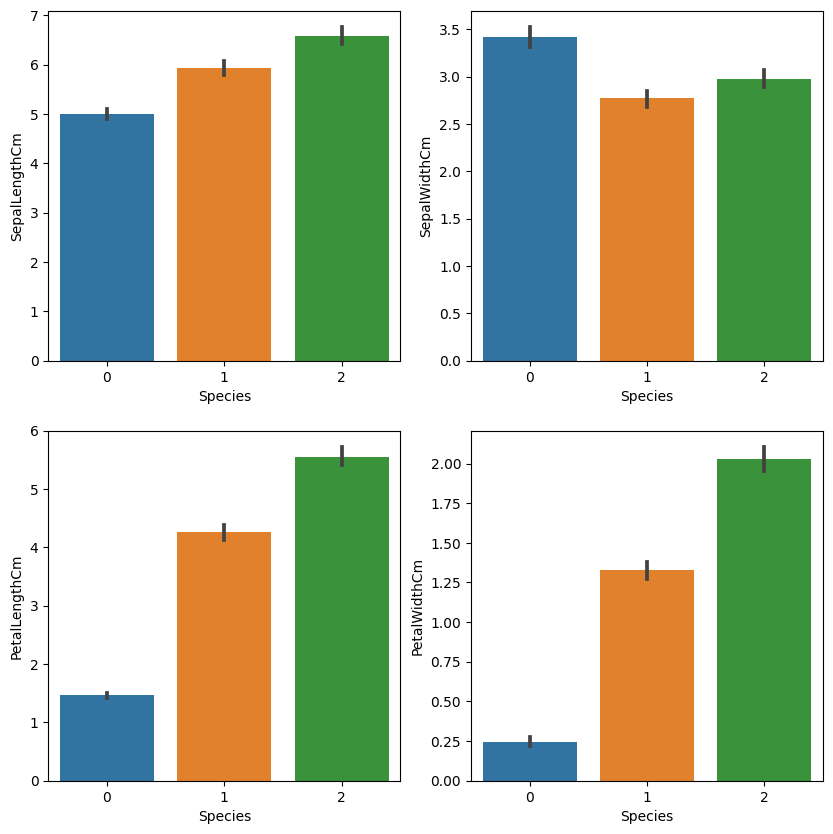

In [12]:
# Plotting barplot of each feature with respect to target variable
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x="Species", y="SepalLengthCm", data=df, ax=ax[0, 0])
sns.barplot(x="Species", y="SepalWidthCm", data=df, ax=ax[0, 1])
sns.barplot(x="Species", y="PetalLengthCm", data=df, ax=ax[1, 0])
sns.barplot(x="Species", y="PetalWidthCm", data=df, ax=ax[1, 1])
plt.show()

## Correlation Plot

<Axes: >

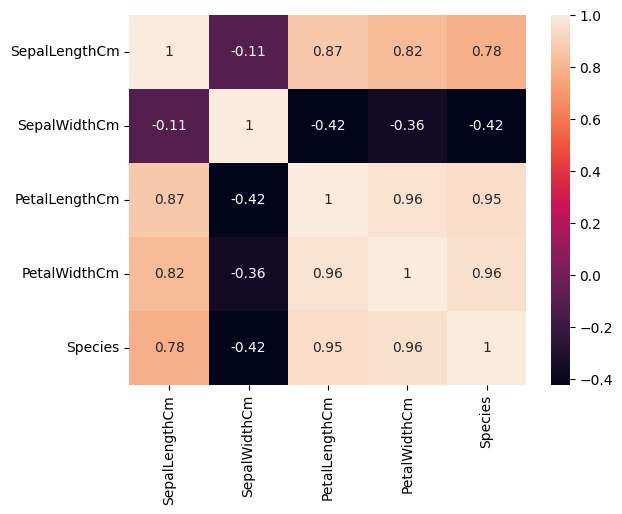

In [13]:
sns.heatmap(df.corr(), annot=True)


## Importing the Machine Learning Libraries and their evaluation metrics.

In [14]:
# Importing different classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Importing splitting, scaling and evaluation metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
)


In [15]:
# Splitting data into X and y

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

# Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

# Scaling data

scaler = StandardScaler()

SCX_train = scaler.fit_transform(X_train[list(X.columns)])
SCX_test = scaler.transform(X_test[list(X.columns)])

# Convert scaled data into dataframe

SCX_train = pd.DataFrame(SCX_train, columns=X_train.columns)
SCX_test = pd.DataFrame(SCX_test, columns=X_test.columns)

# Creating Logistic Regression model with scaled data

> As Logistic Regression is a linear classifier, we need to scale our data before fitting it to the model to avoid any bias in the model.

> We will use StandardScaler to scale our data.

>   * StandardScaler is used when the distribution of the data is not normal.

>   * StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

>   * Unit variance means dividing all the values by the standard deviation.

>   * StandardScaler will transform the data in such a way that its distribution will have a mean value 0 and standard deviation of 1.

In [16]:
# Creating Logistic Regression model

logr = LogisticRegression()
logr.fit(SCX_train, y_train)
y_pred = logr.predict(SCX_test)

# Evaluating model

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average="weighted"))
print("Recall Score: ", recall_score(y_test, y_pred, average="weighted"))
print("Precision Score: ", precision_score(y_test, y_pred, average="weighted"))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n ", classification_report(y_test, y_pred))

Accuracy Score:  0.9333333333333333
F1 Score:  0.9333333333333333
Recall Score:  0.9333333333333333
Precision Score:  0.9333333333333333
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



>  ### So we got 93.33% accuracy with Logistic Regression with scaled data

## Creating the Logistic Regression 

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
ypred = classifier.predict(X_test)

print("Accuracy of the model is:", accuracy_score(y_test, ypred) * 100)
print("Classification Report:\n", classification_report(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))
print("F1 Score: ", f1_score(y_test, ypred, average="weighted"))
print("Recall Score: ", recall_score(y_test, ypred, average="weighted"))
print("Precision Score: ", precision_score(y_test, ypred, average="weighted"))


Accuracy of the model is: 96.66666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
F1 Score:  0.9665831244778613
Recall Score:  0.9666666666666667
Precision Score:  0.9696969696969696


>  #### We got 96.67% accuracy with Logistic Regression without scaling the data.

>  #### We are getting better accuracy with Logistic Regression withour scaling the data.

# Creating a KNN model with k=11

In [23]:
# Creating KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluating model

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average="weighted"))
print("Recall Score: ", recall_score(y_test, y_pred, average="weighted"))
print("Precision Score: ", precision_score(y_test, y_pred, average="weighted"))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n ", classification_report(y_test, y_pred))


Accuracy Score:  0.9666666666666667
F1 Score:  0.9665831244778613
Recall Score:  0.9666666666666667
Precision Score:  0.9696969696969696
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Predicting with One Data Point

>  * Giving the input as 2-dimensional array beacuse the predict method takes 2-dimensional array as input. 

In [45]:
classifier.predict([[5, 3, 3, 1]])

array([1], dtype=int64)